In [2]:
import pandas as pd
import pickle
from utility import *

In [4]:
tokens = load_pickle('data/tokens_selected.pickle')

In [6]:
cosmetic = pd.read_csv('data/cosmetics_reviews_final.csv')

In [7]:
reviews = cosmetic['review']

In [8]:
review_docs = [tokenize(review) for review in reviews]

In [24]:
save_pickle('data/review_docs.pickle', review_docs)

In [9]:
from gensim.models import word2vec
wv = word2vec
model = wv.Word2Vec(review_docs, size=300, workers=4, min_count=40, iter=100)

In [21]:
model.save("model/word2vec01.model")

In [22]:
model.init_sims(replace=True)

In [17]:
model.wv.most_similar('촉촉하다/Adjective', topn=100)

/usr/local/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('건조하다/Adjective', 0.37269285321235657),
 ('매끈하다/Adjective', 0.37038740515708923),
 ('촉촉/Noun', 0.36932456493377686),
 ('가볍다/Adjective', 0.3681897521018982),
 ('편안하다/Adjective', 0.3107049763202667),
 ('부드럽다/Adjective', 0.29652661085128784),
 ('좋다/Adjective', 0.2958674430847168),
 ('물광/Noun', 0.2922726571559906),
 ('땡기다/Verb', 0.2725337743759155),
 ('얇다/Adjective', 0.27155357599258423),
 ('잘되다/Verb', 0.26986163854599),
 ('적당하다/Adjective', 0.2691398859024048),
 ('환하다/Adjective', 0.26807355880737305),
 ('력/Suffix', 0.2640474736690521),
 ('두껍다/Adjective', 0.26252123713493347),
 ('흡수/Noun', 0.2576604187488556),
 ('화사하다/Adjective', 0.25531208515167236),
 ('당기다/Verb', 0.25488847494125366),
 ('무겁다/Adjective', 0.2505543828010559),
 ('뽀송뽀송/Adverb', 0.25049740076065063),
 ('답답하다/Adjective', 0.24891109764575958),
 ('순하다/Adjective', 0.24596744775772095),
 ('수분/Noun', 0.2455570548772812),
 ('겉도/Noun', 0.24533969163894653),
 ('도/Josa', 0.2423575073480606),
 ('밀리/Noun', 0.2412353903055191),
 ('피부/Nou

In [23]:
model.wv.most_similar_cosmul('촉촉하다/Adjective', topn=100)

[('건조하다/Adjective', 0.6863457560539246),
 ('매끈하다/Adjective', 0.6851930618286133),
 ('촉촉/Noun', 0.6846616268157959),
 ('가볍다/Adjective', 0.684094250202179),
 ('편안하다/Adjective', 0.6553518772125244),
 ('부드럽다/Adjective', 0.6482627391815186),
 ('좋다/Adjective', 0.6479331254959106),
 ('물광/Noun', 0.6461357474327087),
 ('땡기다/Verb', 0.63626629114151),
 ('얇다/Adjective', 0.635776162147522),
 ('잘되다/Verb', 0.6349302530288696),
 ('적당하다/Adjective', 0.6345693469047546),
 ('환하다/Adjective', 0.6340361833572388),
 ('력/Suffix', 0.6320231556892395),
 ('두껍다/Adjective', 0.6312600374221802),
 ('흡수/Noun', 0.6288295984268188),
 ('화사하다/Adjective', 0.6276554465293884),
 ('당기다/Verb', 0.6274436712265015),
 ('무겁다/Adjective', 0.6252765655517578),
 ('뽀송뽀송/Adverb', 0.6252480745315552),
 ('답답하다/Adjective', 0.6244549751281738),
 ('순하다/Adjective', 0.6229830980300903),
 ('수분/Noun', 0.6227779388427734),
 ('겉도/Noun', 0.6226692199707031),
 ('도/Josa', 0.621178150177002),
 ('밀리/Noun', 0.6206170916557312),
 ('피부/Noun', 0.6202641129

In [25]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4222
[ 0.04054499 -0.00062256 -0.00970613 -0.00530686  0.10480928 -0.02927355
  0.08799978  0.03257926 -0.07512177 -0.0856544 ]


In [26]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [27]:
df.head()

,x,y
어/Noun,-3.191305,9.053346
피치/Noun,-17.984451,10.514212
쓰다/Verb,7.196838,23.929682
음/Noun,-6.567039,17.218874
발/Noun,-27.434385,-2.553454


In [31]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
# 폰트 설정
from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

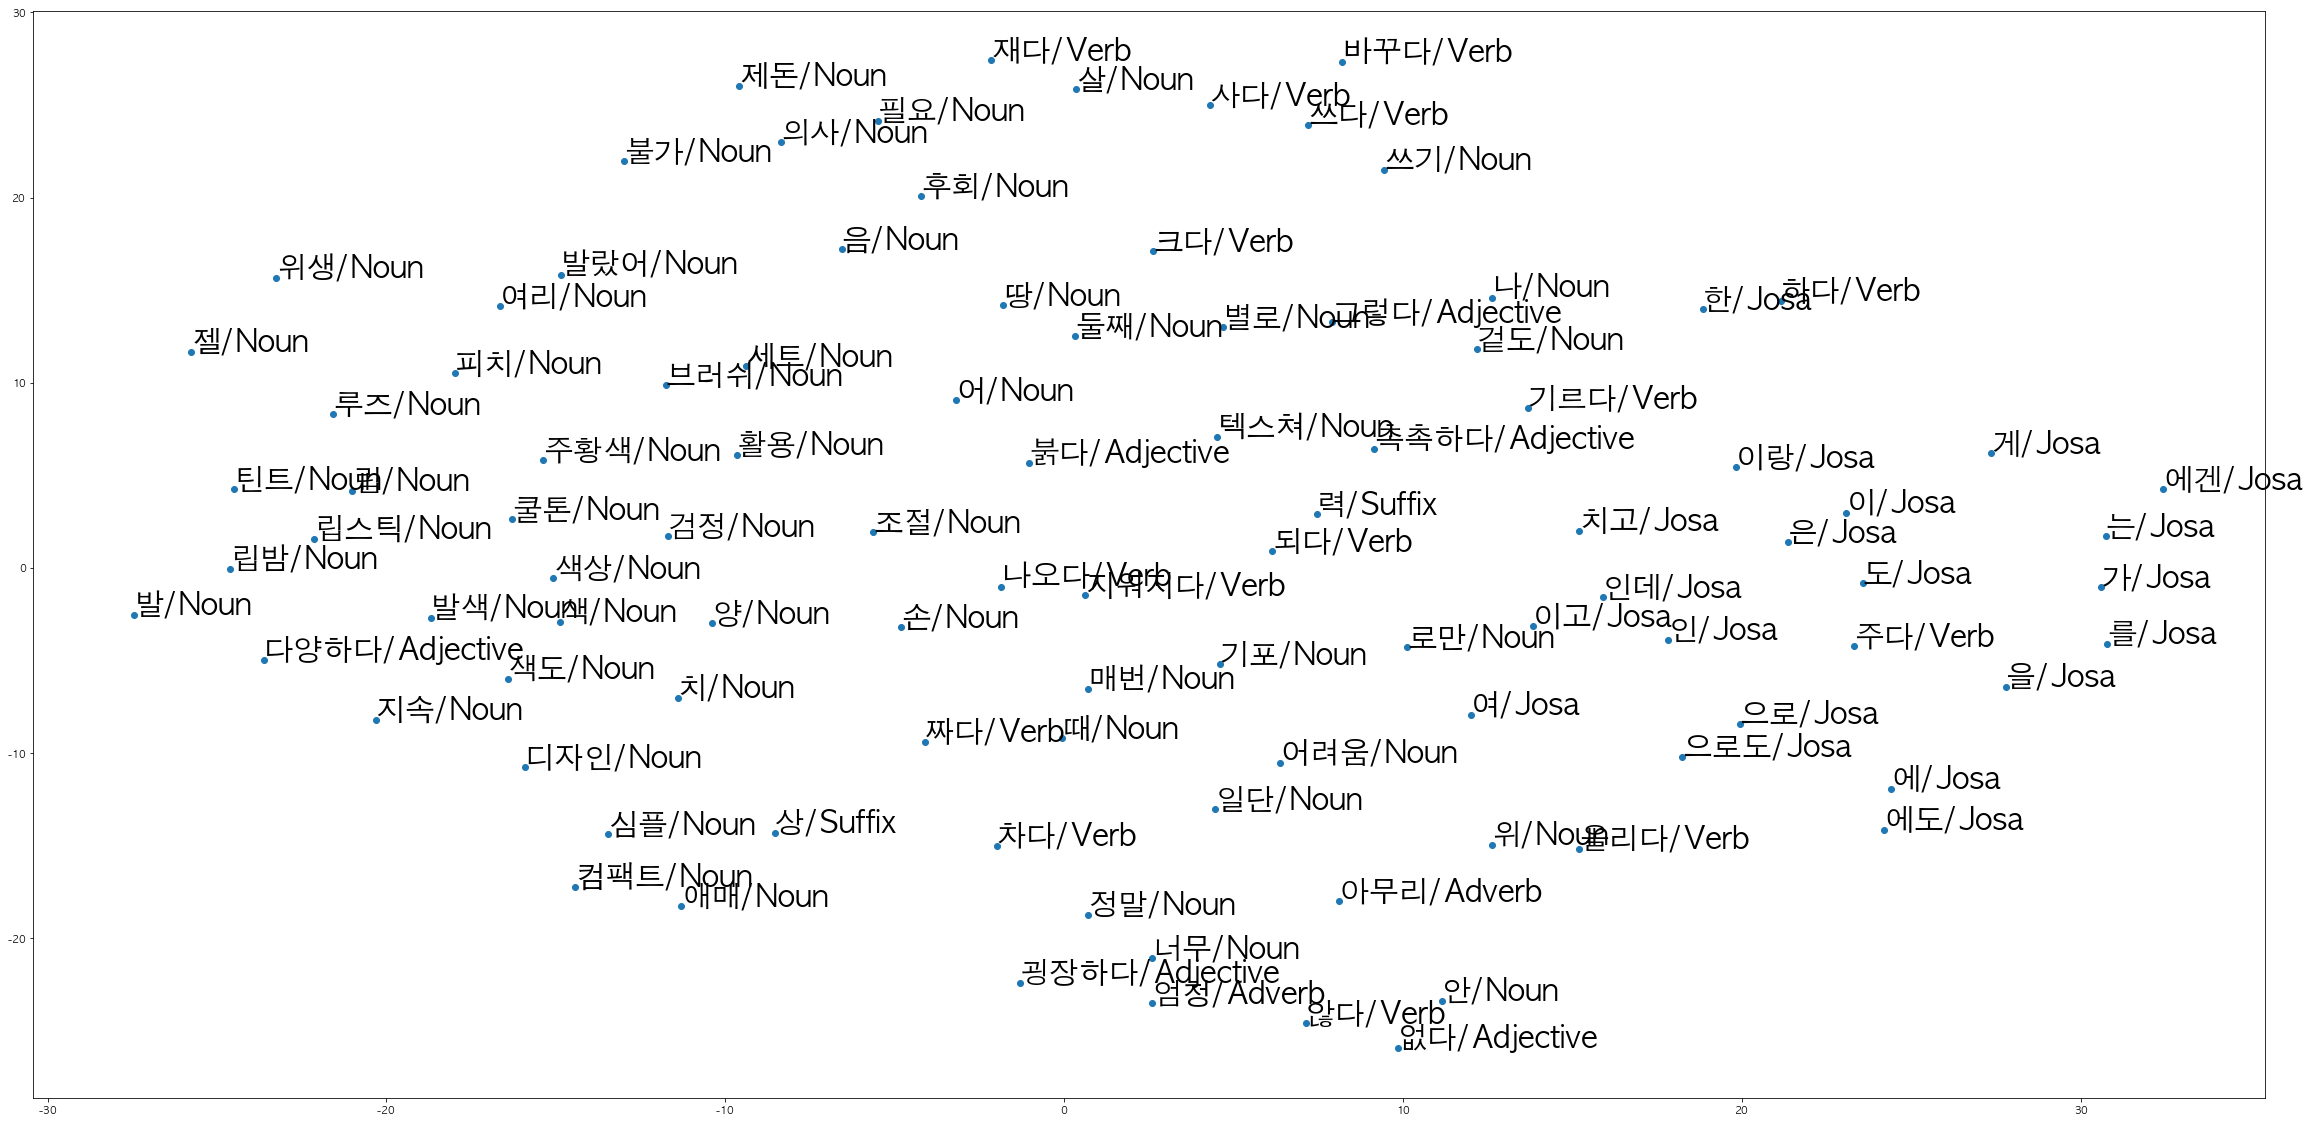

In [32]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()